# XGBoost

In [0]:
import numpy as np
import pandas as pd
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer 

In [0]:
cancer = load_breast_cancer()

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=42
)

In [0]:
model = xgb.XGBClassifier(
    eta = 0.02,
    min_child_weight= 2,
    max_depth= 4,
    gamma=0.9,
    subsample=0.8,
    colsample_bytree=0.8,
    Lambda=0.4,
    alpha=0.4,
    scale_pos_weight=1,
    objective= 'binary:logistic',
    eval_metric = 'rmse',
    random_state=0
)

In [28]:
model.fit(X_train, y_train)

XGBClassifier(Lambda=0.4, alpha=0.4, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              eta=0.02, eval_metric='rmse', gamma=0.9, learning_rate=0.1,
              max_delta_step=0, max_depth=4, min_child_weight=2, missing=None,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.8, verbosity=1)

In [0]:
#predictions = model.predict(X_test)

In [30]:
# 訓練データの精度
model.score(X_train, y_train)

0.9976525821596244

In [31]:
# テストデータの精度
model.score(X_test, y_test)

0.972027972027972

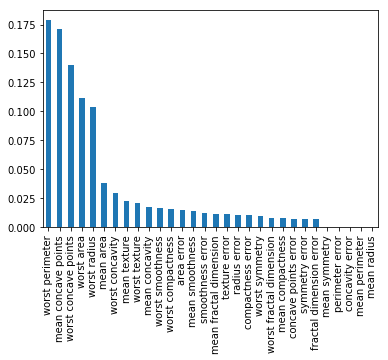

In [28]:
# モデル構築の中でどの変数が重要な役割を担ったのかを定量的に把握する
s = pd.Series(model.feature_importances_, 
              index=cancer.feature_names )

# 取得した値を降順に表示
s.sort_values(ascending=False).plot.bar(color='C0')

## グリッドサーチとランダムフォレスト（木に関するパラメータ）

In [0]:
from sklearn.model_selection import GridSearchCV

# パラメータの設定
param_grid = {
    'max_depth': [1, 5, 10],
    #'min_child_weight': [1, 2, 4],
    #'gamma' : [0.1, 0.2, 0.3],
    'subsample': np.arange(0.3, 1, 0.3),
    'colsample_bytree' : [0.5, 1]
}

In [0]:
model = xgb.XGBClassifier(
    eta = 0.02,
    n_estimators= 2000,
    max_depth= 4,
    min_child_weight= 2,
    gamma=0.9,                       
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'binary:logistic',
    alpha=0.4,
    Lambda=0.4,
    nthread= -1,
    scale_pos_weight=1,
    random_state=0
)

In [0]:
grid_search = GridSearchCV(model,param_grid,cv=5)

In [21]:
grid_search.fit(X_train,y_train)

print("Test set score:{:.4f}".format(grid_search.score(X_test,y_test)))
print("Best parameters:{}".format(grid_search.best_params_))
print("Best cross-validation score:{:.4f}".format(grid_search.best_score_))

Test set score:0.9650
Best parameters:{'Lambda': 1, 'alpha': 1}
Best cross-validation score:0.9601


## グリッドサーチとランダムフォレスト（正則化に関するパラメータ）

In [0]:
from sklearn.model_selection import GridSearchCV

# パラメータの設定
param_grid = {
    'Lambda': [1, 5, 10],
    'alpha': [1, 2, 4,],
}

In [0]:
model = xgb.XGBClassifier(
    eta = 0.15,
    n_estimators= 2000,
    max_depth= 4,
    min_child_weight= 2,
    gamma=0.9,                       
    subsample=0.8,
    colsample_bytree=0.5,
    objective= 'binary:logistic',
    alpha=0.4,
    nthread= -1,
    scale_pos_weight=1,
    random_state=0
)

In [0]:
grid_search = GridSearchCV(model,param_grid,cv=5)

In [17]:
grid_search.fit(X_train,y_train)

print("Test set score:{:.4f}".format(grid_search.score(X_test,y_test)))
print("Best parameters:{}".format(grid_search.best_params_))
print("Best cross-validation score:{:.4f}".format(grid_search.best_score_))

Test set score:0.9720
Best parameters:{'Lambda': 1, 'alpha': 1}
Best cross-validation score:0.9624
